# stage 2
<b style="color:Red">
<li>Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"</li>
<li>Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.
</li>
</b>

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/ml_stem_analysis.csv')

In [3]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,Y3) Process or Implementation Evaluation Type,Y3) Process or Implementation Evaluation Type 1,Y3) Process or Implementation Evaluation Type 2,Y4) Portfolio Evaluation/Review Type,Y4) Portfolio Evaluation/Review Type 1,Y4) Portfolio Evaluation/Review Type 2,Y5) Expert Review Type,Y5) Expert Review Type 1,Growth,target
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002.0,5.24,7.19,5.70,General STEM,...,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,37.213740,1
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006.0,14.00,14.00,14.00,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007.0,5.00,5.00,4.37,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,0.000000,1
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002.0,4.57,11.79,4.18,General STEM,...,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,157.986871,1
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999.0,1.63,2.74,2.02,General STEM,...,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN,68.098160,1


In [4]:
# last row is having almost NAN values hence dropped 
data.drop(252,inplace=True)

In [5]:
data.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,P) External Funding Allocation,R1) Joint Funding of Investment (with Agencies),R1) Joint Funding of Investment (with Agencies) 2,R1) Joint Funding of Investment (with Agencies) 5,R1) Joint Funding of Investment (with Agencies) 8,R1) Joint Funding of Investment (with Agencies) 11,R2) Joint Funding of Investment (with Other) 4,R2) Joint Funding of Investment (with Other) 7,R2) Joint Funding of Investment (with Other) 10,Growth,target
count,241.000000,252.000000,252.000000,252.000000,0.0,0.0,12.000000,4.000000,1.0000,1.000,2.000000,1.00,1.000,252.000000,252.000000
mean,1998.464730,11.098554,13.311074,13.592407,NaN,NaN,1.650048,1.048625,0.0445,0.089,0.887000,1.82,2.204,35.189945,0.793651
std,11.653317,28.597586,35.676249,35.751874,NaN,NaN,1.910847,1.392363,NaN,NaN,1.112986,NaN,NaN,110.418532,0.405489
min,1914.000000,0.000000,0.000000,0.000000,NaN,NaN,0.050000,0.044500,0.0445,0.089,0.100000,1.82,2.204,-100.000000,0.000000
25%,1993.000000,0.474025,0.712500,0.852750,NaN,NaN,0.198375,0.048625,0.0445,0.089,0.493500,1.82,2.204,0.000000,1.000000
50%,2002.000000,1.650000,1.994500,2.455000,NaN,NaN,0.737625,0.575000,0.0445,0.089,0.887000,1.82,2.204,4.966815,1.000000
75%,2007.000000,6.764750,7.995000,9.276750,NaN,NaN,3.250457,1.575000,0.0445,0.089,1.280500,1.82,2.204,42.147393,1.000000
max,2010.000000,259.076349,341.000000,379.776000,NaN,NaN,5.000000,3.000000,0.0445,0.089,1.674000,1.82,2.204,1400.000000,1.000000


# Removing  attribute  

In [6]:
#contain only NaN
data = data.drop(['P) External Funding Allocation','R1) Joint Funding of Investment (with Agencies)'],axis=1)

In [7]:
data.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,R1) Joint Funding of Investment (with Agencies) 2,R1) Joint Funding of Investment (with Agencies) 5,R1) Joint Funding of Investment (with Agencies) 8,R1) Joint Funding of Investment (with Agencies) 11,R2) Joint Funding of Investment (with Other) 4,R2) Joint Funding of Investment (with Other) 7,R2) Joint Funding of Investment (with Other) 10,Growth,target
count,241.000000,252.000000,252.000000,252.000000,12.000000,4.000000,1.0000,1.000,2.000000,1.00,1.000,252.000000,252.000000
mean,1998.464730,11.098554,13.311074,13.592407,1.650048,1.048625,0.0445,0.089,0.887000,1.82,2.204,35.189945,0.793651
std,11.653317,28.597586,35.676249,35.751874,1.910847,1.392363,NaN,NaN,1.112986,NaN,NaN,110.418532,0.405489
min,1914.000000,0.000000,0.000000,0.000000,0.050000,0.044500,0.0445,0.089,0.100000,1.82,2.204,-100.000000,0.000000
25%,1993.000000,0.474025,0.712500,0.852750,0.198375,0.048625,0.0445,0.089,0.493500,1.82,2.204,0.000000,1.000000
50%,2002.000000,1.650000,1.994500,2.455000,0.737625,0.575000,0.0445,0.089,0.887000,1.82,2.204,4.966815,1.000000
75%,2007.000000,6.764750,7.995000,9.276750,3.250457,1.575000,0.0445,0.089,1.280500,1.82,2.204,42.147393,1.000000
max,2010.000000,259.076349,341.000000,379.776000,5.000000,3.000000,0.0445,0.089,1.674000,1.82,2.204,1400.000000,1.000000


In [8]:
# removing attribute which contain values only in few rows
col=['R1) Joint Funding of Investment (with Agencies) 2','R1) Joint Funding of Investment (with Agencies) 5',
     'R1) Joint Funding of Investment (with Agencies) 8','R1) Joint Funding of Investment (with Agencies) 11',
     'R2) Joint Funding of Investment (with Other) 4','R2) Joint Funding of Investment (with Other) 7',
     'R2) Joint Funding of Investment (with Other) 10'
    ]
data=data.drop(col,axis=1)

In [9]:
data.describe()

,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,Growth,target
count,241.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1998.464730,11.098554,13.311074,13.592407,35.189945,0.793651
std,11.653317,28.597586,35.676249,35.751874,110.418532,0.405489
min,1914.000000,0.000000,0.000000,0.000000,-100.000000,0.000000
25%,1993.000000,0.474025,0.712500,0.852750,0.000000,1.000000
50%,2002.000000,1.650000,1.994500,2.455000,4.966815,1.000000
75%,2007.000000,6.764750,7.995000,9.276750,42.147393,1.000000
max,2010.000000,259.076349,341.000000,379.776000,1400.000000,1.000000


In [10]:
# removing attribute that contain different values in all rows or same value in all rows
for each in data.columns:
    if(len(list(data[each].value_counts())) ==252) or (len(list(data[each].value_counts())) ==251) or (len(list(data[each].value_counts())) ==1):
        data = data.drop(each,axis=1)

In [11]:
# removing the value that have most value NaN
for each in data.columns:
    if ( data[each].isnull().sum() > int(252*.6)):
        data = data.drop(each,axis=1)
         

In [12]:
data.head()

,Agency,Subagency,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,E) Agency or Mission-Related Workforce Needs?,F1) Primary Investment Objective,I1) STEM Learners Targeted? Specify.,...,M) Geographic Region,M) Geographic Region 1,N) STEM Discipline Focus 12,Q) Legislation Required to Shift Focus?,S) Investment Partnerships,U) Measured Outputs,V) Outcomes Measured,X) Evaluated Since 2005?,Growth,target
0,National Science Foundation,Directorate for Geosciences (GEO),2002.0,5.24,7.19,5.70,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,...,National scope or not targeted to a geographic...,x,NaN,Don't know,Required,NaN,NaN,YES,37.213740,1
1,National Science Foundation,Directorate for Computer & Information Science...,2006.0,14.00,14.00,14.00,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,...,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NaN,YES,0.000000,1
2,National Science Foundation,Directorate for Computer & Information Science...,2007.0,5.00,5.00,4.37,General STEM,NaN,Institutional Capacity: Support advancement an...,NaN,...,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NONE,YES,0.000000,1
3,National Science Foundation,Directorate for Geosciences (GEO),2002.0,4.57,11.79,4.18,General STEM,NaN,"Engagement: Increase learners’ engagement, int...",Pre-K-20 learners,...,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,Number of learners (any age) served,NaN,YES,157.986871,1
4,National Science Foundation,Directorate for Geosciences (GEO),1999.0,1.63,2.74,2.02,General STEM,NaN,"Learning: Develop STEM skills, practices, or k...",Pre-K-20 learners,...,National scope or not targeted to a geographic...,x,NaN,Don't know,Encouraged,NaN,NONE,YES,68.098160,1


In [13]:
data.to_csv("stem_useful_feature.csv",index=False)

In [14]:
data2=data

# Univariate graph

In [15]:
#removing the column of all funding variable and Growth
col=['C1) Funding FY2008','C2) Funding FY2009','C3) Funding FY2010','Growth']
data2= data2.drop(col,axis=1)
data2=data2.drop('target',axis=1)

In [16]:
columns=data2.columns

In [17]:
columns

Index(['Agency', 'Subagency', 'B) Year Established',
       'D) Mission-specific or General STEM?',
       'E) Agency or Mission-Related Workforce Needs?',
       'F1) Primary Investment Objective',
       'I1) STEM Learners Targeted? Specify.',
       'I1) STEM Learners Targeted? Specify. 5',
       'I1) STEM Learners Targeted? Specify. 6',
       'J) Focus on Underrepresented Groups in STEM',
       'K) Eligibility Restrictions', 'L) Minority Serving Institutions',
       'M) Geographic Region', 'M) Geographic Region 1',
       'N) STEM Discipline Focus 12',
       'Q) Legislation Required to Shift Focus?', 'S) Investment Partnerships',
       'U) Measured Outputs', 'V) Outcomes Measured',
       'X) Evaluated Since 2005?'],
      dtype='object')

# Analysis of 20 non funding variable

In [18]:
plt.style.available

['seaborn-darkgrid',
 'classic',
 'seaborn-colorblind',
 'seaborn-paper',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-pastel',
 'seaborn-muted',
 'seaborn',
 'seaborn-whitegrid',
 'seaborn-talk',
 'seaborn-bright',
 'seaborn-dark-palette',
 'fivethirtyeight',
 'dark_background',
 'seaborn-dark',
 'ggplot',
 'seaborn-white',
 '_classic_test',
 'seaborn-ticks',
 'grayscale',
 'seaborn-poster',
 'bmh']

In [19]:
plt.style.use('ggplot')

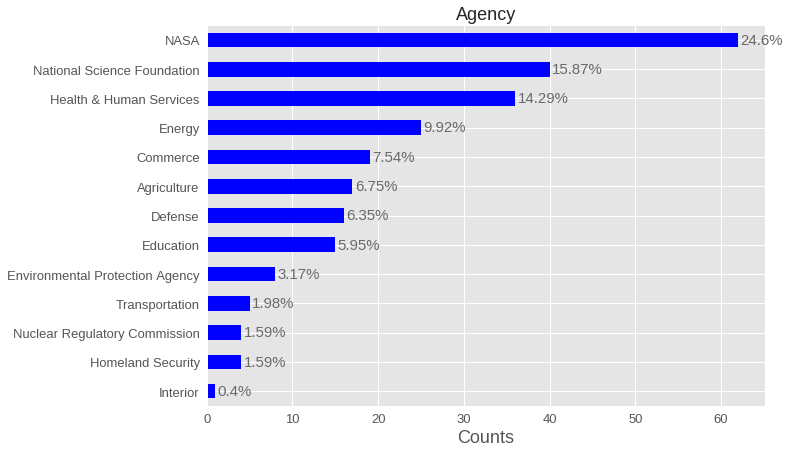

In [20]:
ax = data2['Agency'].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="Blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Agency", fontsize=18)
ax.set_xlabel( "Counts", fontsize=18);
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


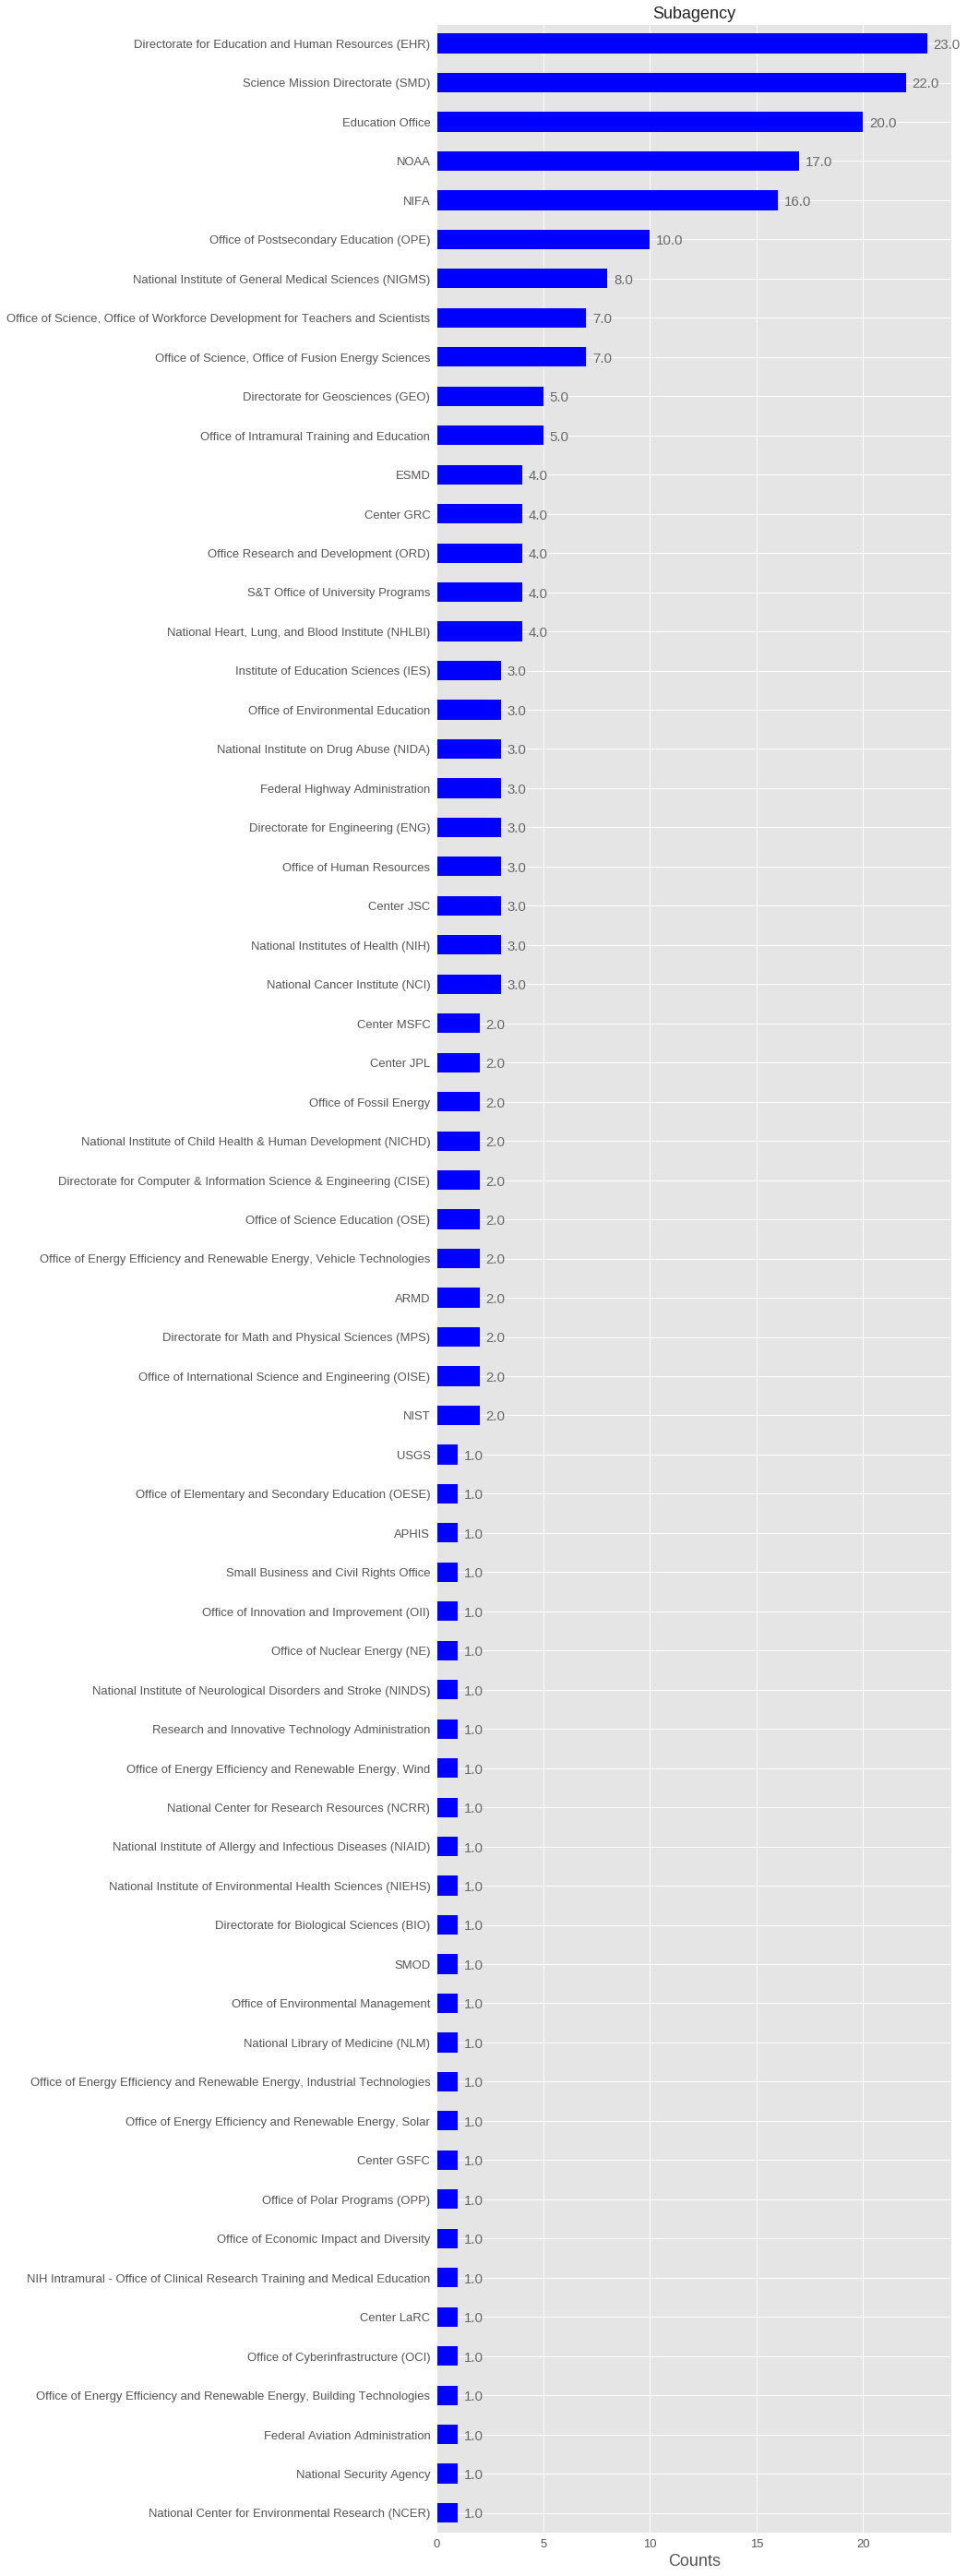

In [21]:
 ax = data2['Subagency'].value_counts().plot(kind='barh', figsize=(10,50),
                                        color="Blue", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Subagency", fontsize=18)
ax.set_xlabel( "Counts", fontsize=18);
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(i.get_width()), fontsize=15,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


# histogram

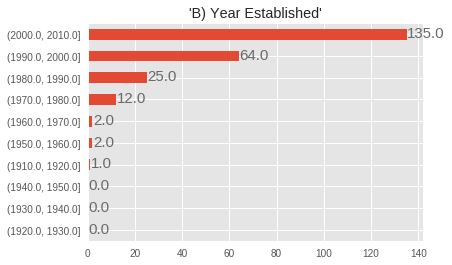

In [22]:
custom_bucket_array = np.linspace(1910,2010,11)
ax=pd.cut(data['B) Year Established'], custom_bucket_array).value_counts().plot(kind='barh')
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(i.get_width()), fontsize=15,
color='dimgrey')
ax.set_title("'B) Year Established'")
 
# invert for largest on top 
ax.invert_yaxis()


# Pie charts

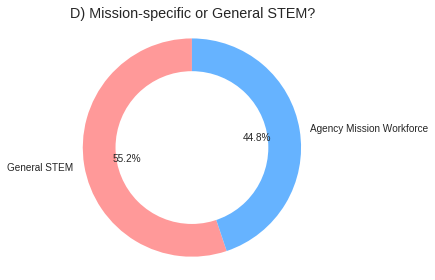

In [23]:
# Pie chart
col = data['D) Mission-specific or General STEM?'].value_counts()
labels = col.index
sizes = col.values 
 
#colors
colors = ['#ff9999','#66b3ff' ]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(4,4)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
ax1.set_title("D) Mission-specific or General STEM?")
plt.tight_layout()
plt.show()

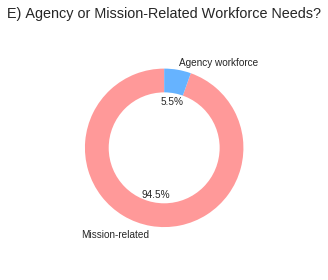

In [24]:
# Pie chart
col = data2['E) Agency or Mission-Related Workforce Needs?'].value_counts()
labels = col.index
sizes = col.values 
 
#colors
colors = ['#ff9999','#66b3ff' ]
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90 )#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.set_size_inches(4,4)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal') 
ax1.set_title('E) Agency or Mission-Related Workforce Needs?')
plt.tight_layout()
plt.show()

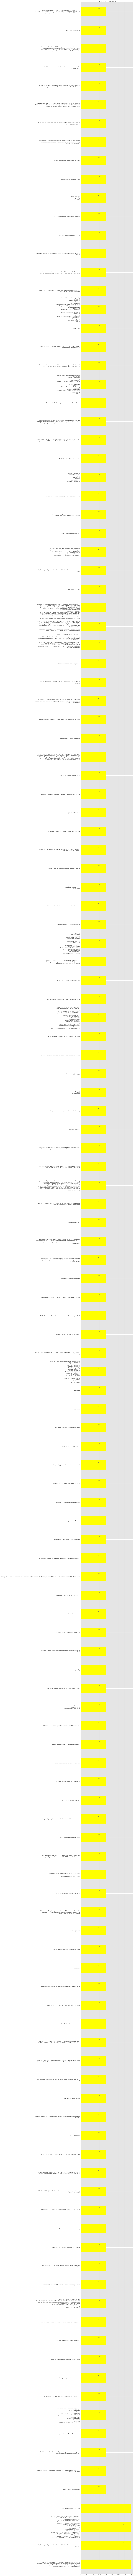

In [25]:
ax=data2['N) STEM Discipline Focus 12'].value_counts().plot(kind='barh',figsize=(10,500),
                                        color="Yellow", fontsize=13)
plt.title("'N) STEM Discipline Focus 12'")
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()-.3, i.get_y()+.38, \
            str(i.get_width()), fontsize=15,
color='dimgrey')



# plotting all graphs together

In [26]:
non_fy_var=list(data2.columns)
non_fy_var.remove("N) STEM Discipline Focus 12")

non_fy_var.remove("C1) Funding FY2008")
non_fy_var.remove('C2) Funding FY2009')
non_fy_var.remove( 'C3) Funding FY2010')

In [27]:
non_fy_var

['Agency',
 'Subagency',
 'B) Year Established',
 'D) Mission-specific or General STEM?',
 'E) Agency or Mission-Related Workforce Needs?',
 'F1) Primary Investment Objective',
 'I1) STEM Learners Targeted? Specify.',
 'I1) STEM Learners Targeted? Specify. 5',
 'I1) STEM Learners Targeted? Specify. 6',
 'J) Focus on Underrepresented Groups in STEM',
 'K) Eligibility Restrictions',
 'L) Minority Serving Institutions',
 'M) Geographic Region',
 'M) Geographic Region 1',
 'Q) Legislation Required to Shift Focus?',
 'S) Investment Partnerships',
 'U) Measured Outputs',
 'V) Outcomes Measured',
 'X) Evaluated Since 2005?']

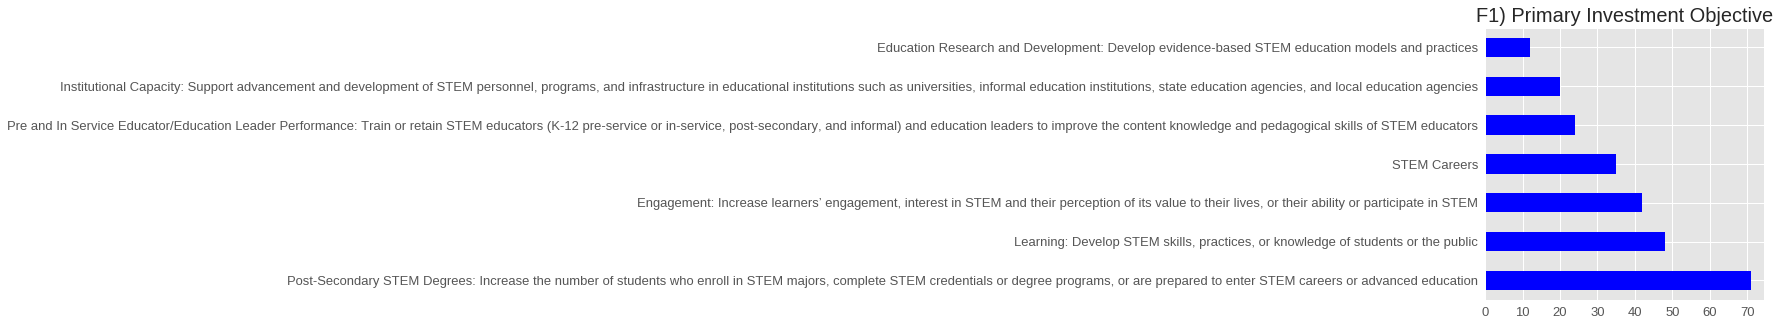

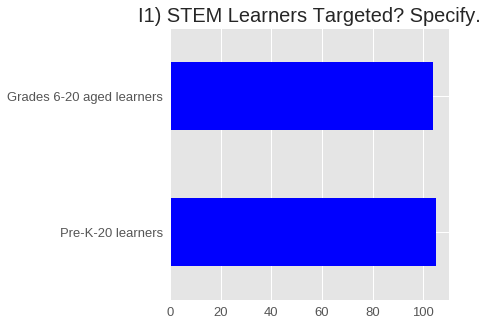

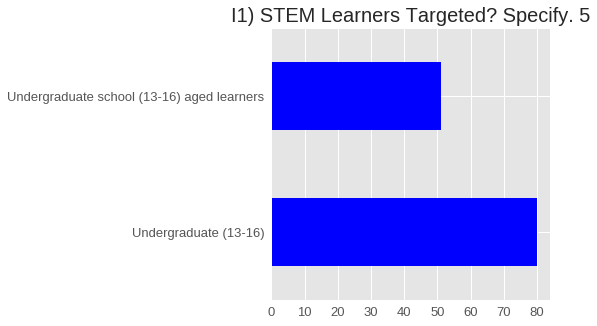

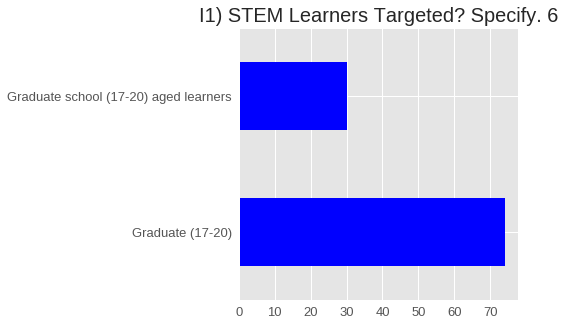

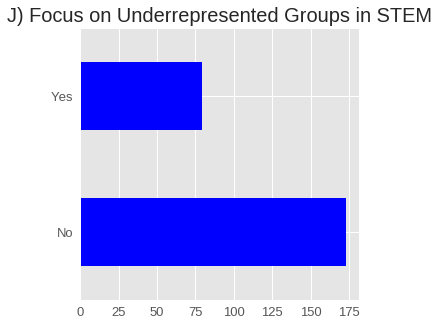

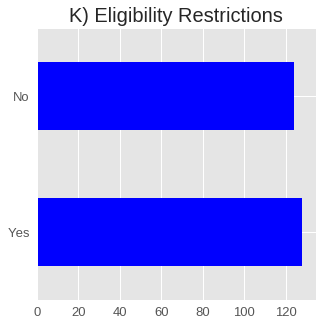

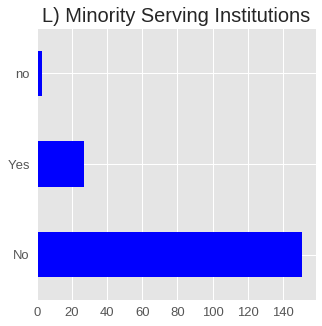

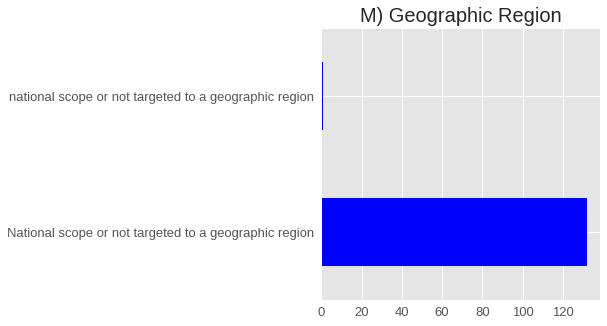

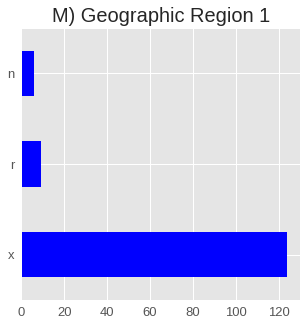

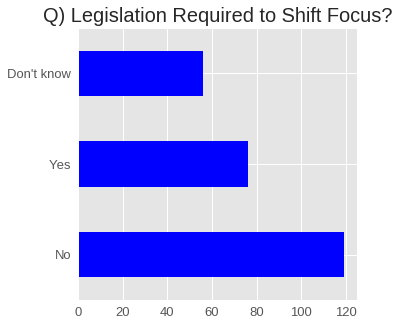

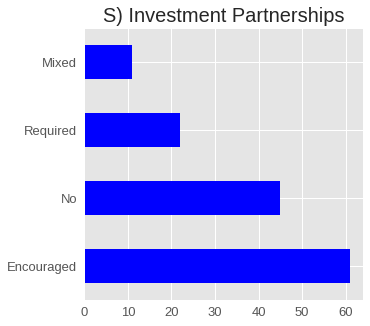

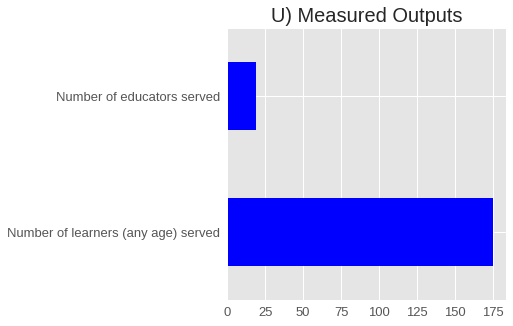

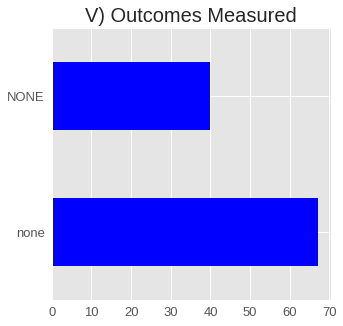

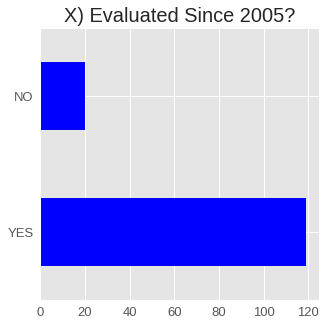

In [28]:
for each in non_fy_var[5:]:
    plt.figure()
    plt.title(each,fontsize=20)
    data2[each].value_counts().plot(kind='barh',figsize=(5,5),
                                        color="Blue", fontsize=13)
    plt.show()
    print('\n\n')

### Mutual info score

In [29]:
 
from sklearn.metrics import mutual_info_score
 
def MI(df,y):
    lt=[]
    for i in df.columns:
        j=df[i]
        lt.append(mutual_info_score(j.values,y))
    mi_score=pd.DataFrame(lt,columns=["mutual info score"])
    mi_score["column name"]=df.columns
    mi_score.set_index("column name",inplace=True)
    return mi_score
data=pd.read_csv('ml_stem_analysis.csv')
df1 = data
#print(df1.columns)
y1 = df1['target']
df1 = df1.drop('target',axis=1)

df1.fillna(0,inplace=True)
#6 and 9 for non- funding variables
for i in df1.columns[:6]:
    j=df1[i]
    j.replace(df1[df1[i]!=0][i].unique(),range(1,len(df1[df1[i]!=0][i].unique())+1),inplace=True)
for i in df1.columns[9:]:
    j=df1[i]
    j.replace(df1[df1[i]!=0][i].unique(),range(1,len(df1[df1[i]!=0][i].unique())+1),inplace=True)    
mutual_info_score = pd.concat([MI(df1.iloc[:,0:6],y1),MI(df1.iloc[:,9:],y1)])

 

In [30]:
mutual_info_score.to_csv("data/MI.csv",index=True)

In [31]:
MI_data=pd.read_csv("data/MI.csv")

In [32]:
MI_data 

,column name,mutual info score
0,Index Number,0.507979
1,Investment Name,0.507979
2,Agency,0.029627
3,Subagency,0.158575
4,A) Brief Description,0.507979
5,B) Year Established,0.105631
6,D) Mission-specific or General STEM?,0.003061
7,E) Agency or Mission-Related Workforce Needs?,0.002996
8,F1) Primary Investment Objective,0.011582
9,F2) Secondary Investment Objectives,0.001916


In [33]:
len(df1.columns)

257